In [1]:
# Importing Libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Building a dataframe
candidates = {'Sr_No': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40],
              'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['Sr_No','gmat', 'gpa','work_experience','admitted'])
print (df)

    Sr_No  gmat  gpa  work_experience  admitted
0       1   780  4.0                3         1
1       2   750  3.9                4         1
2       3   690  3.3                3         0
3       4   710  3.7                5         1
4       5   680  3.9                4         0
5       6   730  3.7                6         1
6       7   690  2.3                1         0
7       8   720  3.3                4         1
8       9   740  3.3                5         1
9      10   690  1.7                1         0
10     11   610  2.7                3         0
11     12   690  3.7                5         1
12     13   710  3.7                6         1
13     14   680  3.3                4         0
14     15   770  3.3                3         1
15     16   610  3.0                1         0
16     17   580  2.7                4         0
17     18   650  3.7                6         1
18     19   540  2.7                2         0
19     20   590  2.3                3   

Accuracy:  0.9


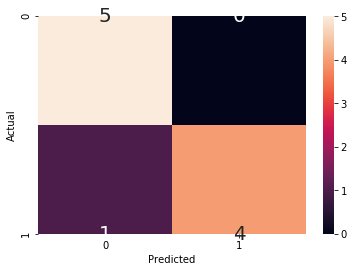

In [2]:
# Set the independent and dependent variable
x= df[['Sr_No','gmat', 'gpa','work_experience']]
y = df['admitted']

# Apply train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

# Apply Logistic Regression
logistic_regression= LogisticRegression(solver='lbfgs')
logistic_regression.fit(x_train,y_train)
y_pred=logistic_regression.predict(x_test)

# Preparing the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 20})

# Accuracy and plot the confusion matrix
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

# Accuracy is (TP+TN)/Total

In [3]:
columns = {"Sr_No"}

Results = pd.DataFrame(columns = columns)
Results["Sr_No"]=x_test.Sr_No
Results["gmat"]=x_test.gmat
Results["gpa"] =x_test.gpa
Results["work_experience"]=x_test.work_experience

Results

,Sr_No,gmat,gpa,work_experience
22,23,550,2.3,4
20,21,620,3.3,2
25,26,670,3.3,6
4,5,680,3.9,4
10,11,610,2.7,3
15,16,610,3.0,1
28,29,650,3.7,6
11,12,690,3.7,5
18,19,540,2.7,2
29,30,660,3.3,5


In [4]:
inner_join = pd.merge(Results,df,on="Sr_No",how='inner')
inner_join

,Sr_No,gmat_x,gpa_x,work_experience_x,gmat_y,gpa_y,work_experience_y,admitted
0,23,550,2.3,4,550,2.3,4,0
1,21,620,3.3,2,620,3.3,2,1
2,26,670,3.3,6,670,3.3,6,1
3,5,680,3.9,4,680,3.9,4,0
4,11,610,2.7,3,610,2.7,3,0
5,16,610,3.0,1,610,3.0,1,0
6,29,650,3.7,6,650,3.7,6,1
7,12,690,3.7,5,690,3.7,5,1
8,19,540,2.7,2,540,2.7,2,0
9,30,660,3.3,5,660,3.3,5,1


In [5]:
df1 = pd.DataFrame(y_pred, columns=['y_pred'])
print(df1)

   y_pred
0       0
1       0
2       1
3       0
4       0
5       0
6       1
7       1
8       0
9       1


In [6]:
df_list = [inner_join, df1]

merged = pd.concat(df_list, axis=1)
merged

,Sr_No,gmat_x,gpa_x,work_experience_x,gmat_y,gpa_y,work_experience_y,admitted,y_pred
0,23,550,2.3,4,550,2.3,4,0,0
1,21,620,3.3,2,620,3.3,2,1,0
2,26,670,3.3,6,670,3.3,6,1,1
3,5,680,3.9,4,680,3.9,4,0,0
4,11,610,2.7,3,610,2.7,3,0,0
5,16,610,3.0,1,610,3.0,1,0,0
6,29,650,3.7,6,650,3.7,6,1,1
7,12,690,3.7,5,690,3.7,5,1,1
8,19,540,2.7,2,540,2.7,2,0,0
9,30,660,3.3,5,660,3.3,5,1,1
